# import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# import dataset

In [5]:
data = pd.read_csv("H:\Level 4 Information Systems\Plastikat\Plastikat Data\K_means_companies_clustring.csv")
data

,name,longitude,latitude,governorate
0,Schmitt - Jacobi,244,94,Cairo
1,Haley Group,361,111,Cairo
2,Wilkinson - Fahey,145,20,Cairo
3,Marks - Rice,180,83,Cairo
4,Ruecker Group,451,162,Cairo
...,...,...,...,...
151,Joyce Abshire,1225,1067,Alexandria
152,Leola Buckridge,1270,1414,Alexandria
153,Marcel Bins,1392,1241,Alexandria
154,Willis Hagenes,1083,1415,Alexandria


# data encoding

In [6]:
df = data.copy()

df['governorate'] = df['governorate'].map({'Cairo':0,'Giza':1,'Alexandria':2})
df.head(23)

,name,longitude,latitude,governorate
0,Schmitt - Jacobi,244,94,0
1,Haley Group,361,111,0
2,Wilkinson - Fahey,145,20,0
3,Marks - Rice,180,83,0
4,Ruecker Group,451,162,0
5,Hauck - Strosin,405,207,0
6,"Emmerich, Kerluke and Adams",166,100,0
7,Gerlach - Berge,87,261,0
8,Walter and Sons,319,314,0
9,"Marks, O'Hara and Schroeder",415,297,0


# plot data

Text(0.5, 1.0, 'Users and Companies')

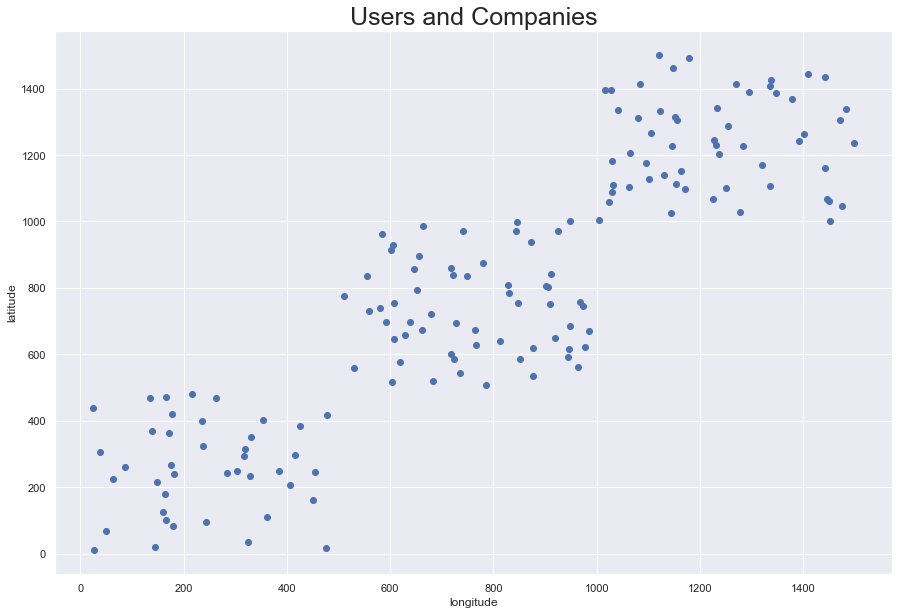

In [7]:
plt.figure(figsize = (15,10))  
plt.scatter(df.longitude, df['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Users and Companies',size=25)

# Kmeans Clustering

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['longitude','latitude']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
df['cluster'] = y_predicted
df.sample(23)

,name,longitude,latitude,governorate,cluster
96,Gillian Heidenreich,912,841,1,0
40,Eunice Schiller,284,241,0,1
45,Skiles - Heller,606,929,1,0
147,Shemar Volkman,1278,1028,2,2
29,Elyssa Tremblay III,238,323,0,1
16,"Schultz, O'Connell and Koelpin",25,438,0,1
3,Marks - Rice,180,83,0,1
5,Hauck - Strosin,405,207,0,1
85,Sigurd Nicolas,510,776,1,0
123,Georgianna Schmeler,1029,1183,2,2


In [11]:
km.cluster_centers_

array([[ 762.77966102,  741.50847458],
       [ 243.90243902,  258.65853659],
       [1228.28571429, 1238.19642857]])

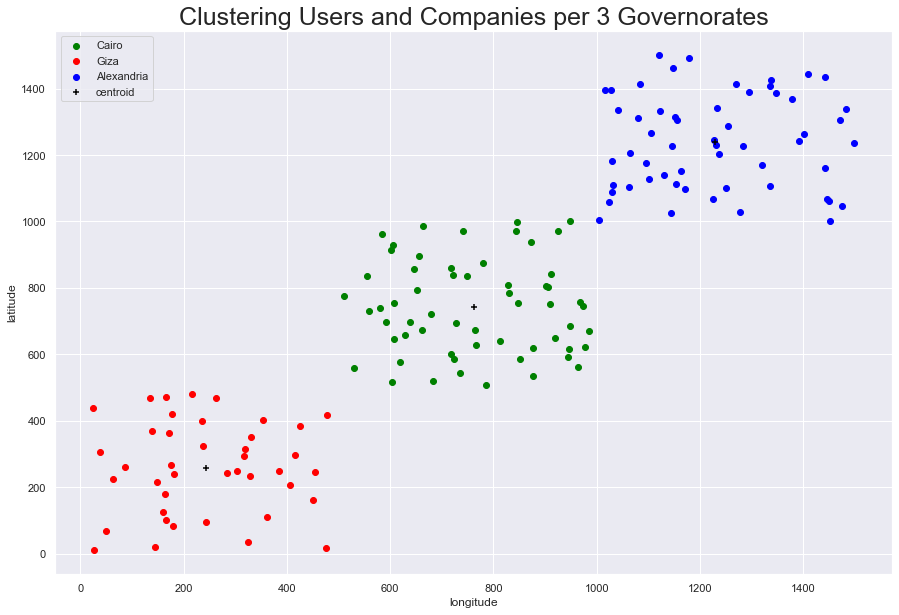

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.figure(figsize = (15,10))  
plt.scatter(df1.longitude, df1['latitude'],color='green',label='Cairo')
plt.scatter(df2.longitude, df2['latitude'],color='red',label='Giza')
plt.scatter(df3.longitude, df3['latitude'],color='blue',label='Alexandria')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black',marker='+',label='centroid')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Clustering Users and Companies per 3 Governorates',size=25)
plt.legend()